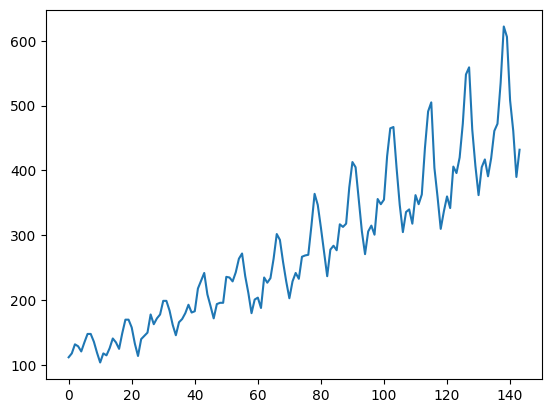

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
dataset = pandas.read_csv('airline-passengers.csv', 
                          usecols=[1],
                          names = ["Passengers"],
                          header = 0)
plt.plot(dataset)
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [4]:
#load data
dataset

,Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [5]:
df = pd.read_csv("airline-passengers.csv")
data = df["Passengers"].values.reshape(-1,1)

train_size = int(len(data) * 0.8)

train = data[:train_size]
test = data[train_size:]

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))

train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [7]:
def create_dataset(dataset, lookback=1):
    X_data, Y_data = [], []
    for i in range (len(dataset) - lookback - 1):
        a = dataset[i:i+lookback, 0]
        X_data.append(a)
        Y_data.append(dataset[i+lookback, 0])
    return np.array(X_data), np.array(Y_data)

In [8]:
look_back = 12

trainX, trainY = create_dataset(train_scaled, look_back)
testX,  testY  = create_dataset(test_scaled,  look_back)

In [9]:
trainX = trainX.reshape(trainX.shape[0], trainX.shape[1], 1)
testX  = testX.reshape(testX.shape[0],  testX.shape[1],  1)

In [10]:
model = Sequential()

model.add(LSTM(32, input_shape=(look_back, 1)))
model.add(Dropout(0.05))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')


2025-12-02 23:42:54.813863: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-12-02 23:42:54.814092: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-12-02 23:42:54.814105: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-12-02 23:42:54.814146: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-12-02 23:42:54.814162: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/anaconda3/envs/tf_lstm/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential 

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

history = model.fit(
    trainX, trainY,
    epochs=300,
    batch_size=1,
    verbose=2,
    validation_data=(testX, testY),
    callbacks=[early_stop]

)

Epoch 1/300


2025-12-02 23:42:55.442157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


102/102 - 2s - 19ms/step - loss: 0.0676 - val_loss: 0.0677
Epoch 2/300
102/102 - 1s - 8ms/step - loss: 0.0173 - val_loss: 0.0498
Epoch 3/300
102/102 - 1s - 8ms/step - loss: 0.0140 - val_loss: 0.0425
Epoch 4/300
102/102 - 1s - 8ms/step - loss: 0.0146 - val_loss: 0.0443
Epoch 5/300
102/102 - 1s - 8ms/step - loss: 0.0133 - val_loss: 0.0393
Epoch 6/300
102/102 - 1s - 8ms/step - loss: 0.0132 - val_loss: 0.0378
Epoch 7/300
102/102 - 1s - 8ms/step - loss: 0.0132 - val_loss: 0.0417
Epoch 8/300
102/102 - 1s - 8ms/step - loss: 0.0122 - val_loss: 0.0363
Epoch 9/300
102/102 - 1s - 8ms/step - loss: 0.0127 - val_loss: 0.0391
Epoch 10/300
102/102 - 1s - 8ms/step - loss: 0.0115 - val_loss: 0.0324
Epoch 11/300
102/102 - 1s - 8ms/step - loss: 0.0104 - val_loss: 0.0388
Epoch 12/300
102/102 - 1s - 8ms/step - loss: 0.0103 - val_loss: 0.0392
Epoch 13/300
102/102 - 1s - 8ms/step - loss: 0.0095 - val_loss: 0.0364
Epoch 14/300
102/102 - 1s - 11ms/step - loss: 0.0108 - val_loss: 0.0338
Epoch 15/300
102/102 - 1s

In [33]:
import plotly.graph_objects as go

# Crear figura
fig_loss = go.Figure()

# 1. Train Loss
fig_loss.add_trace(go.Scatter(
    y=history.history['loss'],
    mode='lines',
    name='Train Loss',
    line=dict(color='#FF3344', width=3)
))

# 2. Validation/Test Loss
fig_loss.add_trace(go.Scatter(
    y=history.history['val_loss'],
    mode='lines',
    name='Test Loss',
    line=dict(color='#00CC96', width=3)
))

# Configuración del diseño
fig_loss.update_layout(
    title='Curva de Aprendizaje: Training vs Test Loss',
    xaxis_title='Epoch',
    yaxis_title='Loss (MSE)',
    template='plotly_white',
    legend=dict(x=1, y=1), # Leyenda arriba a la derecha
    width=900,
    height=500
)

fig_loss.show()

In [14]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainY_inv = scaler.inverse_transform(trainY.reshape(-1,1))
testY_inv  = scaler.inverse_transform(testY.reshape(-1,1))

trainPredict_inv = scaler.inverse_transform(trainPredict)
testPredict_inv  = scaler.inverse_transform(testPredict)

train_rmse = np.sqrt(mean_squared_error(trainY_inv, trainPredict_inv))
test_rmse  = np.sqrt(mean_squared_error(testY_inv,  testPredict_inv))

print("Train RMSE:", train_rmse)
print("Test RMSE: ", test_rmse)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Train RMSE: 21.192777068893463
Test RMSE:  35.43395725602349


In [34]:
import numpy as np
import plotly.graph_objects as go

# array vacío para graficar
trainPredictPlot = np.empty_like(data, dtype=float)
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:len(trainPredict_inv)+look_back, 0] = trainPredict_inv[:,0]

testPredictPlot = np.empty_like(data, dtype=float)
testPredictPlot[:] = np.nan
test_start = train_size + look_back
testPredictPlot[test_start:test_start+len(testPredict_inv), 0] = testPredict_inv[:,0]

# gráfico
fig = go.Figure()

# 1. Actual Data (Datos Reales)
fig.add_trace(go.Scatter(
    y=data[:,0],
    mode='lines',
    name='Actual Data',  # Traducido
    line=dict(color="#32C7F9")
))

# 2. Train Prediction
fig.add_trace(go.Scatter(
    y=trainPredictPlot[:,0],
    mode='lines',
    name='Train Predictions', # Traducido
    line=dict(color="#FD4A59", width=4)
))

# 3. Test Prediction
fig.add_trace(go.Scatter(
    y=testPredictPlot[:,0],
    mode='lines',
    name='Test Predictions', # Traducido
    line=dict(color='#00CC96', width=4)
))

# Configuración del diseño
fig.update_layout(
    title='Airline Passenger Traffic Forecast (LSTM)', # Traducido
    xaxis_title='Time (Months)', # Traducido
    yaxis_title='Passenger Count', # Traducido
    template='plotly_white',
    legend=dict(x=0, y=1, traceorder="normal"),
    width=1000, 
    height=500
)

fig.show()

In [16]:
# 1. Escalar todo el dataset si no lo tenías
data_scaled = scaler.transform(data)

# 2. Obtener la última ventana
last_window = data_scaled[-look_back:]

# 3. Reshape para el LSTM
last_window = last_window.reshape(1, look_back, 1)

# 4. Predicción
next_scaled = model.predict(last_window)

# 5. Desescalar
next_value = scaler.inverse_transform(next_scaled)
print("Predicción del próximo mes:", next_value[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicción del próximo mes: 392.22473
